## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [ ]:
data.shape

(100, 8)

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [ ]:
# correlation between features 
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


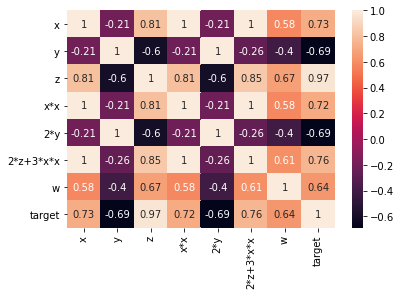

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(alpha=alpha, penalty=penalty)

In [ ]:
logistic = SGDClassifier(loss='log')

In [ ]:
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
model = clf.fit(X,Y)

In [ ]:
best_alpha = model.best_estimator_.get_params()['alpha']
best_penalty = model.best_estimator_.get_params()['penalty']

In [ ]:
best_alpha, best_penalty

(1.0, 'l2')

In [ ]:
best_model_logistic = SGDClassifier(loss='log', alpha=best_alpha, penalty=best_penalty)

In [ ]:
best_model_logistic.fit(X, Y)
best_model_logistic_coeff = best_model_logistic.coef_

In [ ]:
best_model_logistic_coeff

array([[ 0.17103812, -0.18616907,  0.25967448,  0.16714711, -0.18616907,
         0.18178501,  0.15083884]])

In [ ]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results = model_selection.cross_val_score(best_model_logistic, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


Accuracy: 1.000 (0.000)


4. Modifying original data

    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)

    b. Train the same 'best_model' with data (X', Y)

    c. Check the accuracy of the model 'best_model_accuracy_edited'
    
    d. Get the weights W' using best_model.coef_


In [ ]:
new_x = X
new_y = Y

In [ ]:
# adding 10^-2 to all elements of X
row = len(new_x)
col = len(new_x[0])

for r in range(row):
  for c in range(col):
    new_x[r][c] = new_x[r][c] +  (1/100)
  

In [ ]:
# Train the same 'best_model' with data (X', Y)
best_model_logistic.fit(new_x, Y)

SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Check the accuracy of the model 'best_model_accuracy_edited'
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results_edited = model_selection.cross_val_score(best_model_logistic, new_x, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results_edited.mean(), results_edited.std()))


Accuracy: 1.000 (0.000)


In [ ]:
best_model_coef_edited = best_model_logistic.coef_

In [ ]:
#find the absolute change between each value of W and W' ==> |(W-W')|
feature_diff = abs(best_model_logistic_coeff - best_model_logistic.coef_)
feature_diff

array([[0.00236173, 0.00170221, 0.001378  , 0.00267454, 0.00170221,
        0.00258543, 0.00128529]])

In [ ]:
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
results - results_edited

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# print the top 4 features which have higher % change in weights compare to the other feature
feature_diff
sorted_feature_index= np.argsort(feature_diff)

In [ ]:

count = 0
print ("top 4 features which have higher % change in weights compare to the other feature: \n")
for i in sorted_feature_index[0]:
  count += 1
  print (data.columns[i])
  if count ==4 :
    break

top 4 features which have higher % change in weights compare to the other feature: 

w
z
y
2*y


Task 2 Linear SVM

2. Finding the best model for the given data
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'

3. Getting the weights with the original data
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. Modifying original data
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_

5.  Checking deviations in metric and weights 
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature


In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(alpha=alpha, penalty=penalty)

svm = SGDClassifier(loss='hinge')

clf = GridSearchCV(svm, hyperparameters, cv=5, verbose=0)
model = clf.fit(X,Y)

best_alpha = model.best_estimator_.get_params()['alpha']
best_penalty = model.best_estimator_.get_params()['penalty']




In [ ]:
best_alpha, best_penalty

(1.0, 'l2')

In [ ]:
best_model_svm = SGDClassifier(loss='hinge', alpha=best_alpha, penalty=best_penalty)

best_model_svm.fit(X, Y)

SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
best_model_svm_coeff = best_model_svm.coef_
best_model_svm_coeff

array([[ 0.16735403, -0.22421524,  0.35738663,  0.15886585, -0.22421524,
         0.1861288 ,  0.13003009]])

In [ ]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results = model_selection.cross_val_score(best_model_svm, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


Accuracy: 1.000 (0.000)


In [ ]:
new_x = X
new_y = Y

# adding 10^-2 to all elements of X
row = len(new_x)
col = len(new_x[0])

for r in range(row):
  for c in range(col):
    new_x[r][c] = new_x[r][c] +  (1/100)
  


In [ ]:
# Train the same 'best_model' with data (X', Y)
best_model_svm.fit(new_x, Y)


SGDClassifier(alpha=1.0, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Check the accuracy of the model 'best_model_accuracy_edited'
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
results_edited = model_selection.cross_val_score(best_model_svm, new_x, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results_edited.mean(), results_edited.std()))



Accuracy: 1.000 (0.000)


In [ ]:
best_model_svm_coef_edited = best_model_svm.coef_
best_model_svm_coef_edited

array([[ 0.16043829, -0.22168292,  0.35836363,  0.15000505, -0.22168292,
         0.17826821,  0.13986965]])

In [ ]:
#find the absolute change between each value of W and W' ==> |(W-W')|
feature_diff = abs(best_model_svm_coeff - best_model_svm.coef_)
feature_diff


array([[0.00691574, 0.00253232, 0.000977  , 0.0088608 , 0.00253232,
        0.00786058, 0.00983956]])

In [ ]:
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
results - results_edited

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# print the top 4 features which have higher % change in weights compare to the other feature
feature_diff
sorted_feature_index= np.argsort(feature_diff)



count = 0
print ("top 4 features which have higher % change in weights compare to the other feature: \n")
for i in sorted_feature_index[0]:
  count += 1
  print (data.columns[i])
  if count ==4 :
    break


top 4 features which have higher % change in weights compare to the other feature: 

z
y
2*y
x


Before and after adding noise to data, accuracy is same. 

top 4 features which have higher % change is weight compare to other features, almost same. 